https://www.kaggle.com/c/bike-sharing-demand/overview

!kaggle competitions download -c bike-sharing-demand

In [1]:
import os

import datetime as dt

import pandas as pd
import numpy as np

import seaborn as sns


In [2]:
train = pd.read_csv('/Users/reejungkim/Documents/Git/Bike sharing/bike-sharing-demand/train.csv')

In [3]:
test = pd.read_csv('/Users/reejungkim/Documents/Git/Bike sharing/bike-sharing-demand/test.csv')

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
df = train.append(test)

In [7]:
df.shape

(17379, 12)

# EDA

In [8]:
df.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count         6493
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.7+ MB


## Feature engineering

In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [11]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
#df['minute'] = df['datetime'].dt.minute
#df['second'] = df['datetime'].dt.second

In [12]:
#day of week. Sun -> 0 
df['dayofweek'] = df['datetime'].dt.dayofweek

In [13]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,1,1,4,5


In [14]:
index2day = "Sun Mon Tue Wed Thu Fri Sat".split()
index2day

['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

In [15]:
pvt = df.pivot_table(index='dayofweek', columns='season', values='count', aggfunc=np.sum)
pvt.index = index2day

pvt

season,1,2,3,4
Sun,39828.0,77949.0,94070.0,83449.0
Mon,41122.0,84896.0,87606.0,78361.0
Tue,46574.0,77646.0,94214.0,73792.0
Wed,51448.0,86595.0,89902.0,78456.0
Thu,48061.0,83630.0,91223.0,79590.0
Fri,46983.0,89295.0,92789.0,82451.0
Sat,38482.0,88271.0,90858.0,67935.0


In [16]:
dictSeason = {
      1: "Spring",
      2: "Summer",
      3: "Fall", 
    4: "Winter"
}

df.season.map(dictSeason)

In [17]:
df['season_label']=None
df.season_label = df.season.map(dictSeason)

In [18]:
dictWeather = {
   1: "Clear",2: "Mist",3: "Light Snow",4: "Heavy Rain" 
}

In [19]:
df.weather.map(dictWeather).value_counts()

Clear         11413
Mist           4544
Light Snow     1419
Heavy Rain        3
Name: weather, dtype: int64

In [20]:
df['weather_label'] = None
df.weather_label = df.weather.map(dictWeather)

In [21]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,season_label,weather_label
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,1,1,0,5,Spring,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1,1,1,5,Spring,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,1,1,2,5,Spring,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,1,1,3,5,Spring,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,1,1,4,5,Spring,Clear


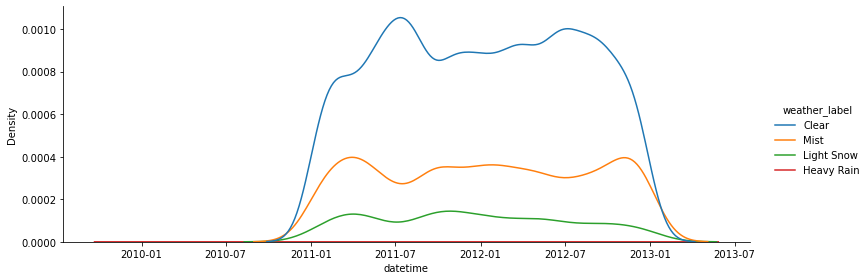

In [22]:
sns.displot(df, x='datetime', kind='kde', hue='weather_label',
            height=4, aspect=2.7)

<AxesSubplot:xlabel='hour', ylabel='count'>

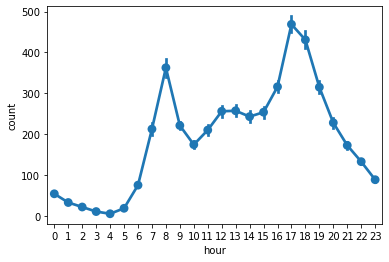

In [23]:
sns.pointplot(data=df, x='hour', y='count')

<AxesSubplot:xlabel='hour', ylabel='count'>

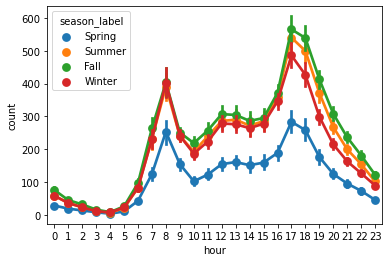

In [24]:
sns.pointplot(data=df, x='hour', y='count', hue='season_label')

<AxesSubplot:xlabel='hour', ylabel='count'>

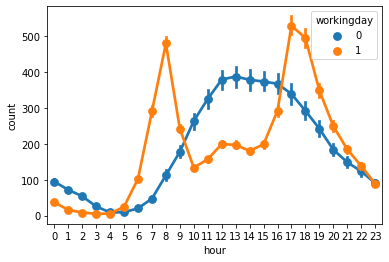

In [25]:
sns.pointplot(data=df, x='hour', y='count', hue='workingday')

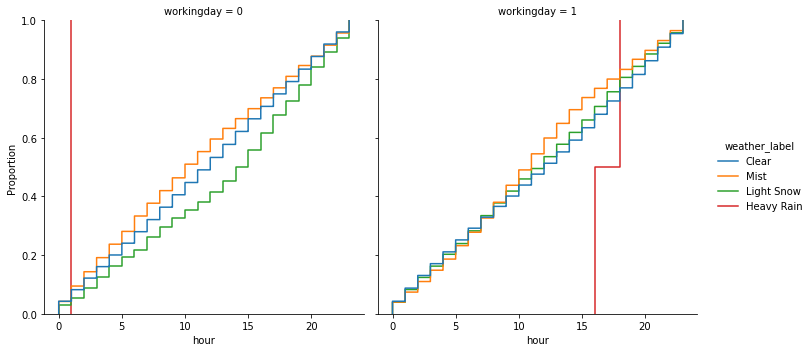

In [26]:
sns.displot(df, x='hour', kind='ecdf', hue='weather_label', col='workingday')

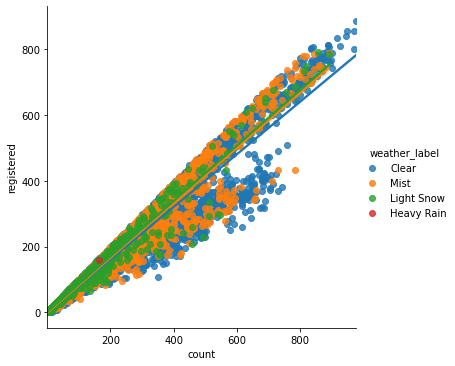

In [27]:
sns.lmplot(data=df, x="count", y="registered", hue="weather_label")

In [28]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
season,1.000000,-0.009585,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.096758,0.164011,0.163439,-0.010742,0.830386,-0.003052,-0.006117,-0.007448
holiday,-0.009585,1.000000,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.043799,-0.020956,-0.005393,0.006692,0.018430,-0.010132,0.000479,-0.188924
workingday,0.013743,-0.252471,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.319111,0.119460,0.011594,-0.002196,-0.003477,0.008627,0.002285,-0.702419
weather,-0.014524,-0.017036,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.135918,-0.109340,-0.128655,-0.019157,0.005400,-0.003882,-0.020203,-0.046424
temp,0.312025,-0.027340,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.467097,0.318571,0.394454,0.040913,0.201691,0.027180,0.137603,-0.036220
atemp,0.319380,-0.030973,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.462067,0.314635,0.389784,0.039222,0.208096,0.021269,0.133750,-0.038918
humidity,0.150625,-0.010588,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.348187,-0.265458,-0.317371,-0.083546,0.164411,0.025663,-0.276498,-0.035233
windspeed,-0.149773,0.003988,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.092276,0.091052,0.101369,-0.008740,-0.135386,0.010505,0.137252,0.003274
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,0.246959
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,-0.084427


<AxesSubplot:>

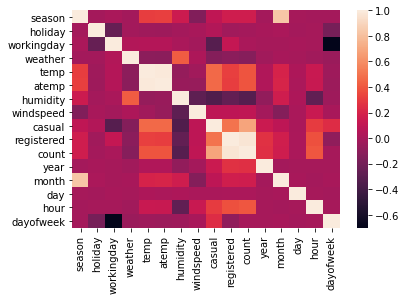

In [29]:
sns.heatmap(df.corr())

## Preprocessing

In [30]:
df = df.drop(columns=['datetime', 'casual', 'registered', 'season_label', 'weather_label']) 

In [31]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,16.0,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40.0,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32.0,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13.0,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1.0,2011,1,1,4,5


In [32]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error


In [33]:
#choose scaler
scaler = RobustScaler()

In [35]:
#scaler application
scaled_X = scaler.fit_transform(df.drop(columns=['count']))
scaled_Y = scaler.fit_transform(df[['count']])  

In [37]:
scaled_Y = np.squeeze(scaled_Y)

In [38]:
scaled_Y

array([-0.53305785, -0.4338843 , -0.46694215, ...,         nan,
               nan,         nan])

In [39]:
train.shape, test.shape, df.shape

((10886, 12), (6493, 9), (17379, 14))

In [40]:
x_train = scaled_X[:10886]
y_train = scaled_Y[:10886]
x_test = scaled_X[10886:]

/Users/reejungkim/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

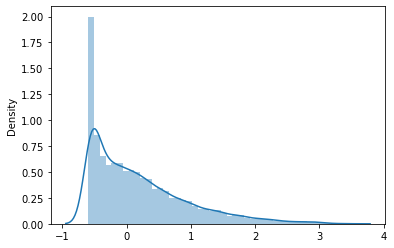

In [41]:
sns.distplot(scaled_Y)

In [42]:
x_train.shape, x_test.shape

((10886, 13), (6493, 13))

## split train data

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=.2)

In [45]:
# Regression Modelling Algorithms
import statsmodels.api as sm
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor


lm = sm.OLS(y_train, x_train).fit() ## sm.OLS(output, input)
y_pred_lm = lm.predict(x_test)

#Print out the statistics
lm.summary()

In [46]:
#random forest regression
randomForest = RandomForestRegressor()
randomForest.fit(x_train, y_train)
y_pred_randomForest = randomForest.predict(x_test)

print("Train score: %0.3f" % randomForest.score(x_train, y_train) )

Train score: 0.993


In [47]:
#support vector regression
svr = SVR()
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)

print("Train score: %0.3f" % svr.score(x_train, y_train) )

Train score: 0.613


In [48]:
#gradient boosting regression
gradientBoosting = GradientBoostingRegressor()
gradientBoosting.fit(x_train, y_train)
y_pred_gradBoost = gradientBoosting.predict(x_test)

print("Train score: %0.3f" % gradientBoosting.score(x_train, y_train))

Train score: 0.863


In [50]:
y_pred = y_pred_randomForest

In [51]:
y_new_inverse = scaler.inverse_transform(y_pred.reshape(-1,1))

In [52]:
y_new_inverse

array([[ 13.4 ],
       [  8.  ],
       [  5.86],
       ...,
       [148.9 ],
       [113.16],
       [ 74.59]])

In [55]:
y_new_inverse = np.squeeze(y_new_inverse)

In [53]:
y_new_inverse.shape

(6493, 1)

In [59]:
result = pd.DataFrame({'count': y_new_inverse} )

In [60]:
result

,count
0,13.40
1,8.00
2,5.86
3,3.46
4,3.23
...,...
6488,300.33
6489,206.98
6490,148.90
6491,113.16


In [ ]:
#Export result as a csv file
import os
os.getcwd()

result.to_csv( 'Submission.csv' , index = False )